In [104]:
import numpy
import pandas

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Quitar:
https://www.kaggle.com/aninditapani/will-it-rain-tomorrow

# Pre-prosesado de los datos

In [105]:
data = pandas.read_csv('weatherAUS.csv', delimiter = ',')

In [106]:
data.shape

(142193, 24)

In [107]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [108]:
cols_to_drop = ['Date','Location','RISK_MM']
data = data.drop(columns=cols_to_drop)
data.shape

(142193, 21)

Revisamos cuántos NaN hay en el set de datos. 

In [109]:
data.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [110]:
cols_to_drop = ['Evaporation','Sunshine','Cloud9am','Cloud3pm']
data = data.drop(columns=cols_to_drop)
data.shape

(142193, 17)

Ahora se van a quitar todas las filas que tengan NaN.

In [111]:
data = data.dropna()
data.shape

(112925, 17)

In [112]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [113]:
data['RainToday'] = data['RainToday'].map({'No':0, 'Yes':1})
data['RainTomorrow'] = data['RainTomorrow'].map({'No':0, 'Yes':1})

In [114]:
data['WindGustDir'] = data['WindGustDir'].astype("category").cat.codes
data['WindDir3pm'] = data['WindDir3pm'].astype("category").cat.codes
data['WindDir9am'] = data['WindDir9am'].astype("category").cat.codes
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [116]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = pandas.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)

# Separando set de entrenamiento y set de pruebas

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
features = data.drop(columns='RainTomorrow')
labels = data['RainTomorrow']

In [119]:
from sklearn.feature_selection import SelectKBest, chi2

In [120]:
selector = SelectKBest(chi2, k=10)
selector.fit(features, labels)
features = selector.transform(features)
features.shape

(112925, 10)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=13)

In [122]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(84693, 10)
(28232, 10)
(84693,)
(28232,)


# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import threading

In [136]:
training_acc = []
test_acc = []
rango = numpy.arange(0.01, 1, 0.01)

def train_model():
    # se construye el modelo de clasificacion
    log_reg = LogisticRegression(C=c, solver='liblinear')
    log_reg.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(log_reg.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(log_reg.score(x_test, y_test))
    
for c in rango:
    threading.Thread(target=train_model).start()

In [137]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]

Best test accuracy = 0.8484698214791726
Training accuracy = 0.8465988924704521
Parameter C = 0.54


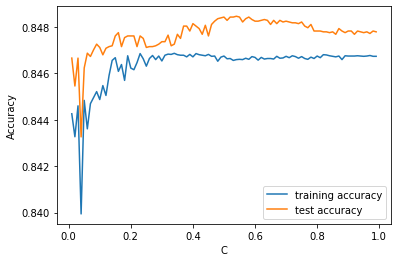

In [138]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter C = " + str(parameter))

# k Nearest Neighbors (kNN)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
training_acc = []
test_acc = []
rango = range(1, 100, 10)

def train_model():
    # se construye el modelo de clasificacion
    log_reg = KNeighborsClassifier(n_neighbors=k)
    log_reg.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(log_reg.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(log_reg.score(x_test, y_test))
    
for k in rango:
    threading.Thread(target=train_model).start()

In [144]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]

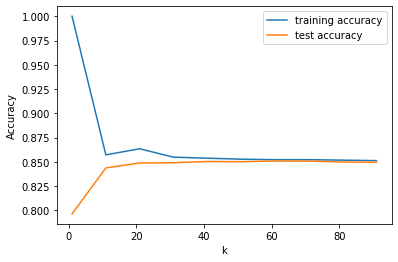

In [145]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()

In [146]:
# se construye el modelo de clasificacion
log_reg = KNeighborsClassifier(n_neighbors=40)
log_reg.fit(x_train, y_train)
# se almacena el "training set accuracy"
print("Training score: " + str(log_reg.score(x_train, y_train)))
# se almacena el "test accuracy"
print("Test score: " + str(log_reg.score(x_test, y_test)))

Training score: 0.853317275335624
Test score: 0.8503825446302069


# naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
training_acc = []
test_acc = []
rango = numpy.arange(0.1, 2, 0.01)

def train_model():
    # se construye el modelo de clasificacion
    log_reg = GaussianNB(var_smoothing=alpha)
    log_reg.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(log_reg.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(log_reg.score(x_test, y_test))
    
for alpha in rango:
    threading.Thread(target=train_model).start()

In [149]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]

Best test accuracy = 0.8237461037120998
Training accuracy = 0.8216145372108675
Parameter alpha = 0.6399999999999997


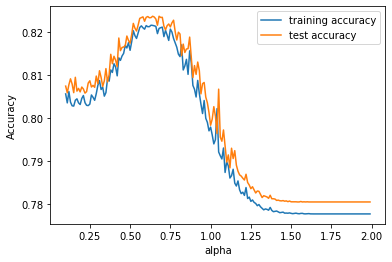

In [150]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter alpha = " + str(parameter))

# Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
training_acc = []
test_acc = []
rango = range(1, 100)

def train_model():
    # se construye el modelo de clasificacion
    log_reg = RandomForestClassifier(n_estimators=estimators)
    log_reg.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(log_reg.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(log_reg.score(x_test, y_test))
    
for estimators in rango:
    threading.Thread(target=train_model).start()

In [153]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]

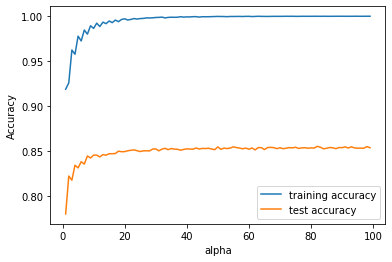

In [155]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

In [156]:
# se construye el modelo de clasificacion
log_reg = RandomForestClassifier(n_estimators=20)
log_reg.fit(x_train, y_train)
# se almacena el "training set accuracy"
print("Training score: " + str(log_reg.score(x_train, y_train)))
# se almacena el "test accuracy"
print("Test score: " + str(log_reg.score(x_test, y_test)))

Training score: 0.9951826006871879
Test score: 0.8479385094927742


# AdaBoost

El objetivo de los métodos de conjunto es combinar las predicciones de varios estimadores de base construidos con un algoritmo de aprendizaje dado para mejorar la generalización / robustez en un solo estimador.

In [157]:
from sklearn.ensemble import AdaBoostClassifier

In [158]:
training_acc = []
test_acc = []
rango = range(1, 100)

def train_model():
    # se construye el modelo de clasificacion
    log_reg = AdaBoostClassifier(n_estimators=estimators)
    log_reg.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(log_reg.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(log_reg.score(x_test, y_test))
    
for estimators in rango:
    threading.Thread(target=train_model).start()

In [161]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]

Best test accuracy = 0.8494970246528761
Training accuracy = 0.8483345731052153
Parameter alpha = 86


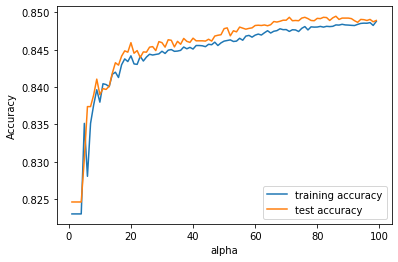

In [162]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter alpha = " + str(parameter))

# PassiveAggressiveClassifier

In [163]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [167]:
training_acc = []
test_acc = []
rango = numpy.arange(0.1, 10, 0.1)

def train_model():
    # se construye el modelo de clasificacion
    log_reg = PassiveAggressiveClassifier(C=ratio)
    log_reg.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(log_reg.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(log_reg.score(x_test, y_test))
    
for ratio in rango:
    threading.Thread(target=train_model).start()

In [168]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]

Best test accuracy = 0.8465570983281383
Training accuracy = 0.8325127224209793
Parameter alpha = 3.3000000000000003


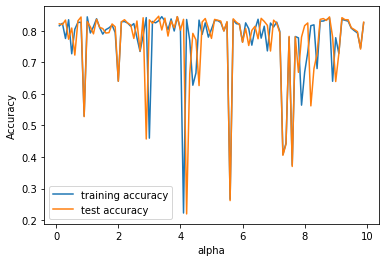

In [169]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter alpha = " + str(parameter))